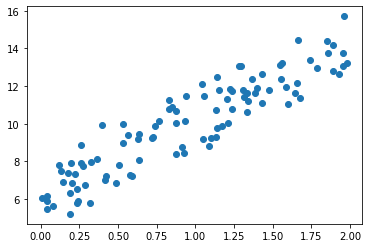

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6을 근사 (w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
# 퍼포먼스 테스트시에 샘플수를 100000로 해야 stockchastic gradient descent 효과를 체크할 수 있다.
# np.random.permutation 함수는 비싸다... 

X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

#X, y 데이터 세트 산점도 시작화

plt.scatter(X, y)

In [2]:
%whos

Variable   Type       Data/Info
-------------------------------
X          ndarray    100x1: 100 elems, type `float64`, 800 bytes
np         module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
y          ndarray    100x1: 100 elems, type `float64`, 800 bytes


In [3]:
np.random.randn?

In [4]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

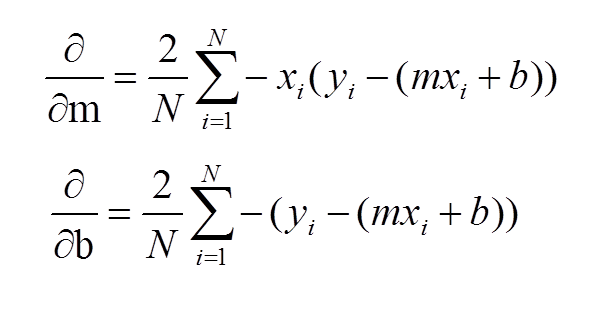

In [5]:
#w1과 w0를 업데이트 할 w1_update, w0_update를 반환
# m = w1, b = w0

def get_weight_updates(w1,w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y- y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))
  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N) * learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N) * learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [6]:
#입력 인자  iters로 주어진 획수만큼 반복적으로 w1 과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters= 10000):
  #w0 와 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  #인자로 주어진 inters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0

In [19]:
%%time
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=100000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0

print("Gradient Descent Total Cost:{0:.4f}".format(get_cost(y, y_pred)))


w1:3.968 w0:6.222
Gradient Descent Total Cost:0.9924
CPU times: user 2.34 s, sys: 3.18 ms, total: 2.34 s
Wall time: 2.35 s


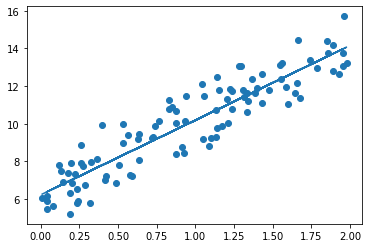

In [8]:
plt.scatter(X, y)
plt.plot(X,y_pred)

In [9]:
%whos

Variable                 Type        Data/Info
----------------------------------------------
X                        ndarray     100x1: 100 elems, type `float64`, 800 bytes
get_cost                 function    <function get_cost at 0x7f4fd61e86a8>
get_weight_updates       function    <function get_weight_updates at 0x7f4fd61e8f28>
gradient_descent_steps   function    <function gradient_descen<...>_steps at 0x7f4fd61ac840>
np                       module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt                      module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
w0                       ndarray     1x1: 1 elems, type `float64`, 8 bytes
w1                       ndarray     1x1: 1 elems, type `float64`, 8 bytes
y                        ndarray     100x1: 100 elems, type `float64`, 800 bytes
y_pred                   ndarray     100x1: 100 elems, type `float64`, 800 bytes


- 경사하강법을 이용해 회귀선이 잘 만들어짐.
- 모든 학습 데이터에 대해서 반복적으로 비용함수를 최소화하는 방향으로 업데이트하기 때문에 수행시간이 오래 걸림.
- 확률적 경사 하강법 (Stochastic Gradient Descent)를 이용 = 미니배치
  - 일부 데이터만 이용해 w가 업데이트 되는 값을 계산
  - 빠른 속도 보장
  - gradient_descent_steps 함수와 유사, 다만 전체 데이터가 아닌 batch_size만큼 추출

In [10]:
print(len(X))
#batch size
batch_size = int(len(X)/50)
print(batch_size)
print(np.random.random_integers(5))

test = np.random.randint(0, len(X),size=5)
print(test)

100
2
4
[ 7 72 61 13  5]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 5 + 1) instead
  """


In [15]:
#batch size
batch_size = int(len(X)/50)

print("batch size:{}".format(batch_size))

#입력 인자  iters로 주어진 획수만큼 반복적으로 w1 과 w0를 업데이트 적용함
def stochastic_gradient_descent_steps(X, y, iters= 10000):
  #w0 와 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  prev_cost = 100000
  iter_index = 0

  print("sample count:{}".format(X.shape[0]))

  #인자로 주어진 inters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
  for ind in range(iters):
    np.random.seed(ind)
    #전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 simple_X, simple_y로 저장
    #아래 함수가 너무 비싸다... CYM....
    stochastic_random_index = np.random.permutation(X.shape[0])
    #stochastic_random_index = np.random.randint(0, len(X),size=batch_size)
    #print(stochastic_random_index)
    #print(stochastic_random_index[0:batch_size])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0

batch size:2


In [12]:
np.random.permutation?

In [20]:
%%time
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=100000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0

print("Stochastic Gradient Descent Total Cost:{0:.4f}".format(get_cost(y, y_pred)))


sample count:100
w1:3.973 w0:6.342
Stochastic Gradient Descent Total Cost:1.0078
CPU times: user 3.58 s, sys: 1.48 ms, total: 3.58 s
Wall time: 3.59 s


In [14]:
 %whos

Variable                            Type        Data/Info
---------------------------------------------------------
X                                   ndarray     100x1: 100 elems, type `float64`, 800 bytes
batch_size                          int         2
get_cost                            function    <function get_cost at 0x7f4fd61e86a8>
get_weight_updates                  function    <function get_weight_updates at 0x7f4fd61e8f28>
gradient_descent_steps              function    <function gradient_descen<...>_steps at 0x7f4fd61ac840>
np                                  module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt                                 module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
stochastic_gradient_descent_steps   function    <function stochastic_grad<...>_steps at 0x7f4fd5cd90d0>
test                                ndarray     5: 5 elems, type `int64`, 40 bytes
w0                                  ndarray     1x1: 1 elems,